### --- Day 24: Never Tell Me The Odds ---

Puzzle description redacted as-per Advent of Code guidelines

You may find the puzzle description at: https://adventofcode.com/2023/day/24

In [2]:
#!import ../Utils.ipynb

In [3]:
var inputLines = LoadPuzzleInput(2023, 24);
WriteLines(inputLines);

Loading puzzle file: Day24.txt
Total lines: 300
Max line length: 68

194592040768564, 332365743938486, 196880917504399 @ 160, -81, 182
119269259427296, 151358331038299, 32133087271013 @ 320, 350, 804
137316267565914, 280950442046082, 163349784223749 @ 252, -89, 298
156784243533036, 239107035457244, 225936623290041 @ 43, -98, -76
321769272453694, 324937275314713, 420778403813678 @ 42, -28, -69


In [4]:
string[] testInputLines = [
    "19, 13, 30 @ -2,  1, -2",
    "18, 19, 22 @ -1, -1, -2",
    "20, 25, 34 @ -2, -2, -4",
    "12, 31, 28 @ -1, -2, -1",
    "20, 19, 15 @  1, -5, -3",
];

In [5]:
record XY(decimal x, decimal y);

class Hailstone(long[] position, long[] velocity)
{
    public long X => position[0];
    public long Y => position[1];
    public long Z => position[2];
    
    public long Vx => velocity[0];
    public long Vy => velocity[1];
    public long Vz => velocity[2];

    public decimal A => (decimal)Vy / Vx;
    public decimal B => Y - (A * X);

    public bool IsParallelTo(Hailstone other) => A == other.A;

    public XY Intersect(Hailstone other)
    {
        var dMinusB = other.B - B;
        var aMinusC = A - other.A;
        var intersectX = dMinusB / aMinusC;
        var intersectY = A * intersectX + B;

        return new(intersectX, intersectY);
    }

    public override string ToString()
    {
        return $"{string.Join(", ", position)} @ {string.Join(", ", velocity)}";
    }
}

In [6]:
Hailstone first = new([0,0], [1,1]);
Hailstone second = new([0,0], [2, 2]);
Hailstone third = new([0,0], [3,4]);

Console.WriteLine(first.IsParallelTo(first));
Console.WriteLine(first.IsParallelTo(second));
Console.WriteLine(first.IsParallelTo(third));

Console.WriteLine(first.A);
Console.WriteLine(third.A);

True
True
False
1
1.3333333333333333333333333333


In [7]:
static Hailstone Parse(string inputLine)
{
    var bits = inputLine.Split("@");
    var position = bits[0].Split(',').Select(long.Parse).ToArray();
    var velocity = bits[1].Split(',').Select(long.Parse).ToArray();

    return new(position, velocity);
}

In [8]:
var testA = Parse(testInputLines[0]);
var testB = Parse(testInputLines[1]);

var intersects = testA.Intersect(testB);
Console.WriteLine(intersects);

XY { x = 14.333333333333333333333333333, y = 15.333333333333333333333333334 }


In [9]:
class HailSim
{
    Hailstone[] hailstones;
    long min;
    long max;
    
    public HailSim(string[] inputLines, long min, long max)
    {
        hailstones = inputLines.Select(Parse).ToArray();
        this.min = min;
        this.max = max;
    }

    public int CheckCollisions()
    {
        int collisions = 0;
        for (var i = 0; i < hailstones.Length; i++)
        {
            for (var j = i + 1; j < hailstones.Length; j++)
            {
                var hailI = hailstones[i];
                var hailJ = hailstones[j];

                if (hailI.IsParallelTo(hailJ)) continue;

                var intersection = hailI.Intersect(hailJ);

                var inRangeX = min <= intersection.x && intersection.x <= max;
                var inRangeY = min <= intersection.y && intersection.y <= max;

                if (inRangeX && inRangeY) 
                {
                    // We are in range. Need to see whether this collision occurs in the future
                    if (
                        TimeToReach(hailI.X, intersection.x, hailI.Vx) > 0
                        && TimeToReach(hailJ.X, intersection.x, hailJ.Vx) > 0
                    )
                    {
                        collisions++;
                    }
                }
            }
        }

        return collisions;
    }

    decimal TimeToReach(long start, decimal end, long velocity) => (end - start) / velocity;

    public Hailstone[] Hailstones => hailstones;
}

In [10]:
// In this example, look for intersections that happen with an X and Y position each at least 7 and at most 27
// ...
// So, in this example, 2 hailstones' future paths cross inside the boundaries of the test area.

var testSimPart1 = new HailSim(testInputLines, 7, 27);
var testAnswer = testSimPart1.CheckCollisions();
Console.WriteLine(testAnswer);

2


In [11]:
// Considering only the X and Y axes, check all pairs of hailstones' future
// paths for intersections. How many of these intersections occur within the test
// area?

var inputLinesSim = new HailSim(inputLines, 200000000000000, 400000000000000);
var part1Answer = inputLinesSim.CheckCollisions();
Console.WriteLine(part1Answer);

17906


In [12]:
// 17906 is correct!
Ensure(17906, part1Answer);

### --- Part Two ---

Puzzle description redacted as-per Advent of Code guidelines

You may find the puzzle description at: https://adventofcode.com/2023/day/24

In [14]:
// Install the ScottPlot NuGet package
#r "nuget:ScottPlot, 5.0.*"

Installed Packages ScottPlot, 5.0.47

Loading extensions from `/Users/iwarrington/.nuget/packages/skiasharp/2.88.9/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

In [15]:
// Setup a custom formatter to display plots as images
using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(800, 600)), HtmlFormatter.MimeType);


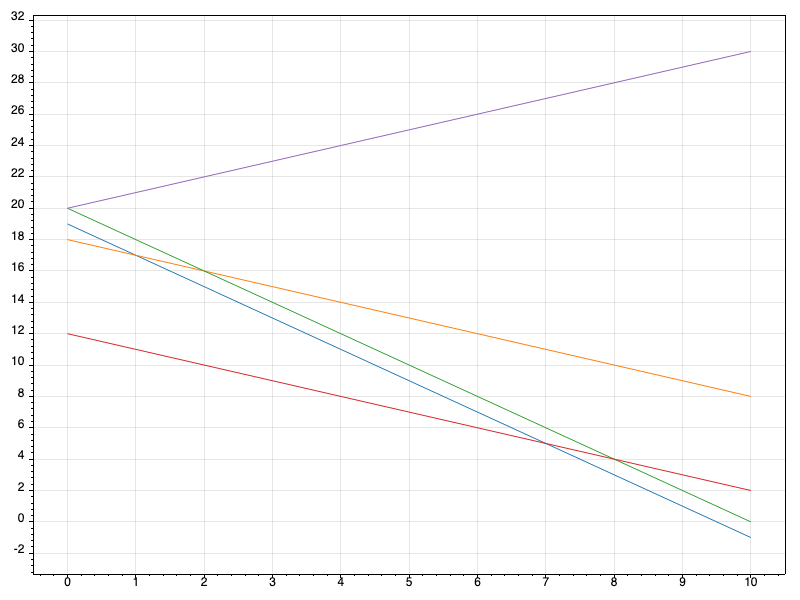

In [16]:
// let's see if we can plot each X position on a graph,

void Render(string[] inputLines, long timePass = 10)
{
    checked
    {
        var sim = new HailSim(inputLines, 0, 1);
        ScottPlot.Plot testSimPlot = new();
        foreach (var h in sim.Hailstones)
        {
            ScottPlot.Coordinates start = new(0, h.X);
            ScottPlot.Coordinates end = new(timePass, h.X + (h.Vx * timePass));
            testSimPlot.Add.Line(start, end);
        }

        display(testSimPlot);
    }
}
Render(testInputLines);


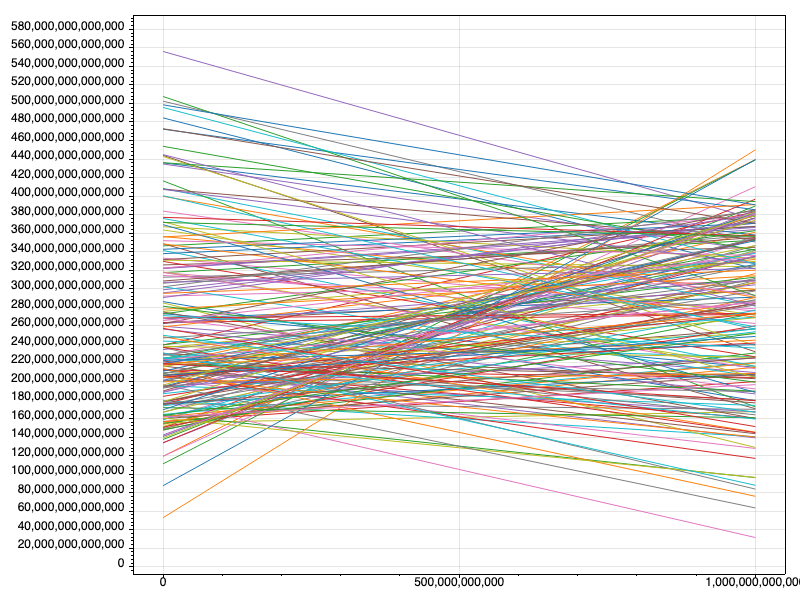

In [17]:
Render(inputLines.Take(200).ToArray(), 1_000_000_000_000);


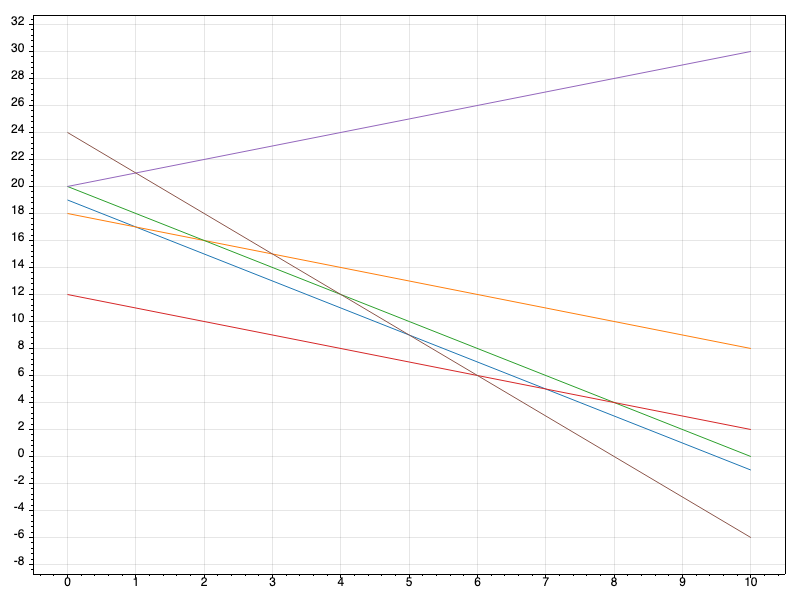

In [18]:
// 24, 13, 10 and throwing the rock at velocity -3, 1, 2

Render(testInputLines.Append("24, 13, 10 @ -3, 1, 2").ToArray());

In [19]:
// Ok, the above confirms that we are on the right track. The line starting at
// 24 intersects every other line. Note that the starting point or slope could
// change, and this would still intersect. The key is that the intersections occur
// at integer intervals. 

// Let's see if we can intersect the lines

class Line(long m, long b)
{
    public static Line FromX(Hailstone hs)
    {
        return new(hs.Vx, hs.X);
    }

    public long M => m;
    public long B => b;

    public XY Intersect(Line other)
    {
        var dMinusB = other.B - B;
        var aMinusC = M - other.M;
        var intersectX = (decimal)dMinusB / (decimal)aMinusC;
        var intersectY = M * intersectX + B;

        return new(intersectX, intersectY);
    }
}

Hailstone h1 = Parse("24, 13, 10 @ -3, 1, 2");
Hailstone h2 = Parse("20, 19, 15 @ 1, -5, -3");

var h1Line = Line.FromX(h1);
var h2Line = Line.FromX(h2);

var intersectCheck = h1Line.Intersect(h2Line);
Console.WriteLine(intersectCheck);

XY { x = 1, y = 21 }


In [20]:
void CheckAll(string[] inputLines, string checkStone)
{
    // var longT = 1_000_000_000_000;
    var longT = 20;
    Render(inputLines.Append(checkStone).ToArray(), longT);
    
    Hailstone cs = Parse(checkStone);
    Line csLine = Line.FromX(cs);

    var sim = new HailSim(inputLines, 0, 1);
    foreach (var simStone in sim.Hailstones)
    {
        var simLine = Line.FromX(simStone);
        var intersectPoint = csLine.Intersect(simLine);

        Console.WriteLine($"{simStone} intersects at point {intersectPoint} {IsValid(intersectPoint)}");
    }
}

bool IsValid(XY intersectPoint)
{
    var xEven = intersectPoint.x == (decimal)((long)intersectPoint.x);
    var xPositive = intersectPoint.x > 0;
    var yEven = intersectPoint.y == (decimal)((long)intersectPoint.y);

    return xEven && xPositive && yEven;
}


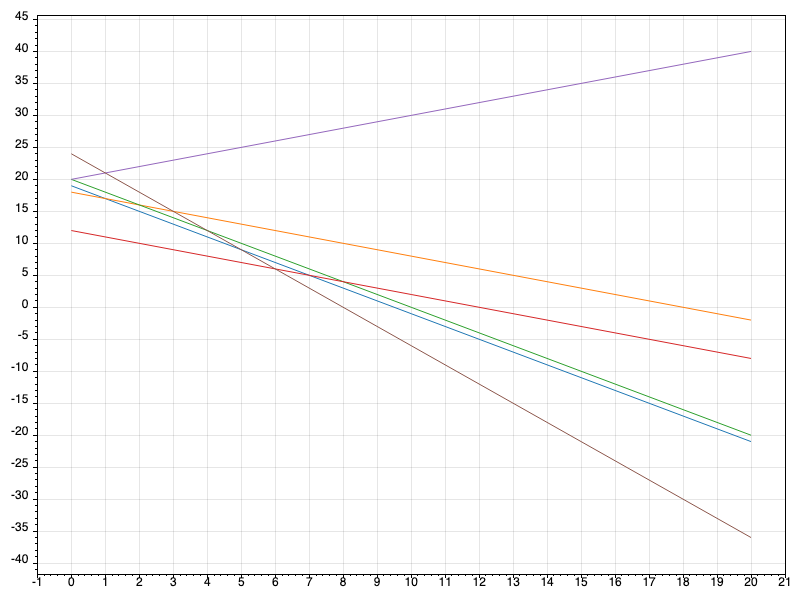

19, 13, 30 @ -2, 1, -2 intersects at point XY { x = 5, y = 9 } True
18, 19, 22 @ -1, -1, -2 intersects at point XY { x = 3, y = 15 } True
20, 25, 34 @ -2, -2, -4 intersects at point XY { x = 4, y = 12 } True
12, 31, 28 @ -1, -2, -1 intersects at point XY { x = 6, y = 6 } True
20, 19, 15 @ 1, -5, -3 intersects at point XY { x = 1, y = 21 } True


In [21]:
CheckAll(testInputLines, "24, 13, 10 @ -3, 1, 2");


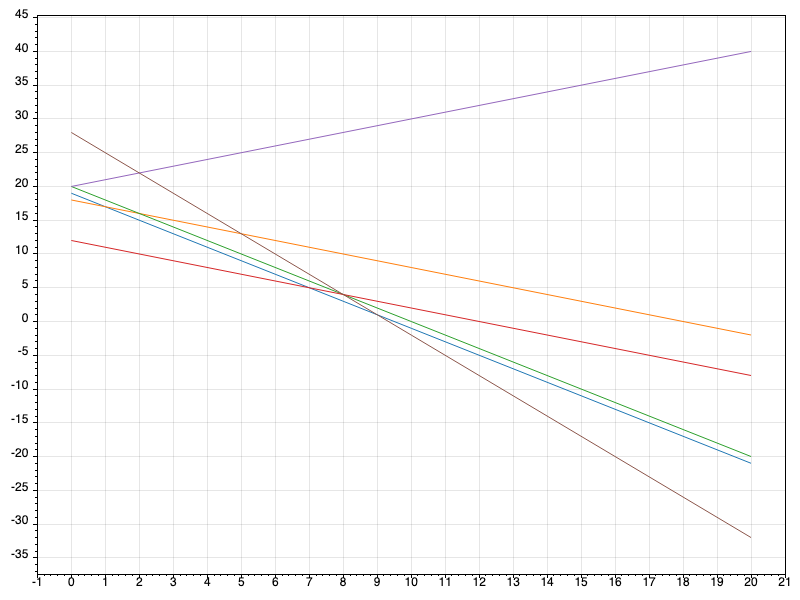

19, 13, 30 @ -2, 1, -2 intersects at point XY { x = 9, y = 1 } True
18, 19, 22 @ -1, -1, -2 intersects at point XY { x = 5, y = 13 } True
20, 25, 34 @ -2, -2, -4 intersects at point XY { x = 8, y = 4 } True
12, 31, 28 @ -1, -2, -1 intersects at point XY { x = 8, y = 4 } True
20, 19, 15 @ 1, -5, -3 intersects at point XY { x = 2, y = 22 } True



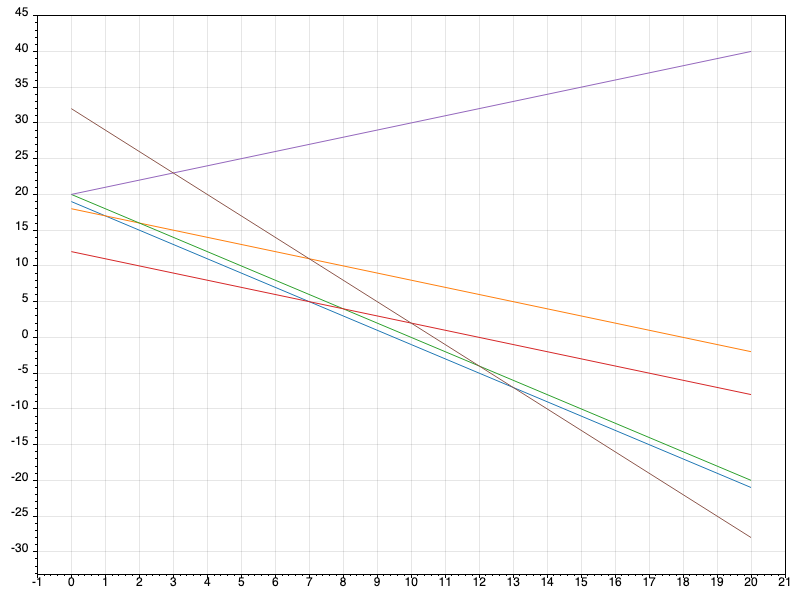

19, 13, 30 @ -2, 1, -2 intersects at point XY { x = 13, y = -7 } True
18, 19, 22 @ -1, -1, -2 intersects at point XY { x = 7, y = 11 } True
20, 25, 34 @ -2, -2, -4 intersects at point XY { x = 12, y = -4 } True
12, 31, 28 @ -1, -2, -1 intersects at point XY { x = 10, y = 2 } True
20, 19, 15 @ 1, -5, -3 intersects at point XY { x = 3, y = 23 } True


In [22]:
// Interestingly, there is an "intersection line" every 4 points, eg 24, 28, 32, etc. 

CheckAll(testInputLines, "28, 13, 10 @ -3, 1, 2");
CheckAll(testInputLines, "32, 13, 10 @ -3, 1, 2");

In [23]:
// I don't exactly know the maths behind why it's 4. But assuming this is some
// general principle, it means that once we find the gradient we can lower the
// intersection line until it'ver very close to the topmost line. Perhaps even
// always t=1?. So let's try intersecting the topmost line at t=1, and then
// adjusting the gradient until we get a hit on all lines.

In [24]:
long FindHighest(HailSim sim, int t)
{
    var lines = sim.Hailstones.Select(Line.FromX).ToList();

    var topLine = lines.Select(l => l.B + (l.M * t)).Max();

    Console.WriteLine($"Highest at time {t} is {topLine}");
    return topLine;
}
FindHighest(testSimPart1, 1);
FindHighest(inputLinesSim, 1);

Highest at time 1 is 21
Highest at time 1 is 556131001350778


In [25]:
string NewStone(long point, long t, long gradient)
{
    var b = point - (gradient * t);
    return $"{b}, 0, 0 @ {gradient}, 0, 0";
}
Console.WriteLine(NewStone(1, 556131001350778, -1))

556131001350779, 0, 0 @ -1, 0, 0


Highest at time 1 is 556131001350778
Check stone is: 556131001351480, 0, 0 @ -702, 0, 0



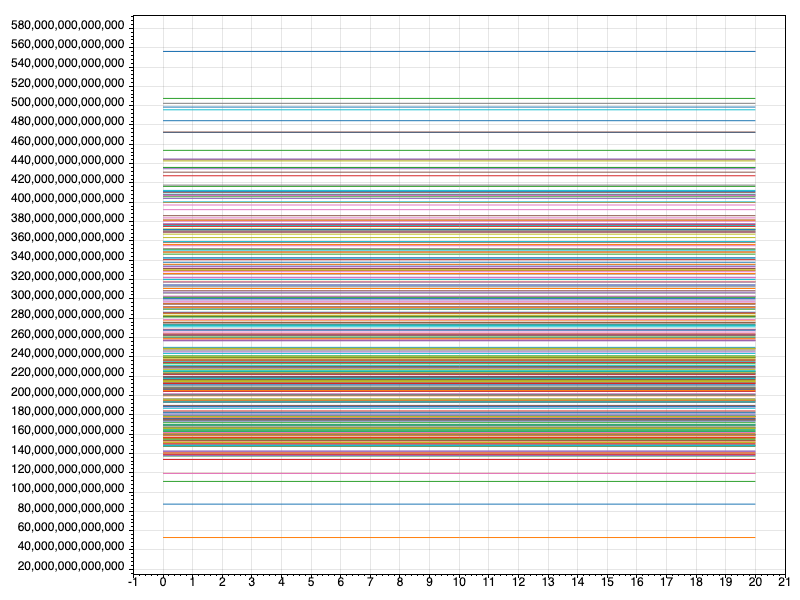

194592040768564, 332365743938486, 196880917504399 @ 160, -81, 182 intersects at point XY { x = 419418747776.00464037122969838, y = 261699040412724.74245939675174 } False
119269259427296, 151358331038299, 32133087271013 @ 320, 350, 804 intersects at point XY { x = 427457673115.63992172211350294, y = 256055714824300.77495107632094 } False
137316267565914, 280950442046082, 163349784223749 @ 252, -89, 298 intersects at point XY { x = 439009154911.49475890985324948, y = 247946574603610.67924528301887 } False
156784243533036, 239107035457244, 225936623290041 @ 43, -98, -76 intersects at point XY { x = 536035916534.82416107382550336, y = 179833787944033.43892617449664 } False
321769272453694, 324937275314713, 420778403813678 @ 42, -28, -69 intersects at point XY { x = 315002323787.3467741935483871, y = 334999370052762.56451612903226 } False
204814986025924, 237908862805026, 274364047444843 @ 52, 43, -34 intersects at point XY { x = 465936359848.21750663129973475, y = 229043676738031.310344827

In [26]:
var Tt = 1;
var gradient = -702;
var highest = FindHighest(inputLinesSim, Tt);
// Console.WriteLine($"Highest point at time {Tt} is {highest}");
var checkStone = NewStone(highest, Tt, gradient);
Console.WriteLine($"Check stone is: {checkStone}");
CheckAll(inputLines, checkStone);

In [27]:
int CheckAllAndCount(string[] inputLines, string checkStone)
{
    Hailstone cs = Parse(checkStone);
    Line csLine = Line.FromX(cs);

    var intersections = 0;

    var sim = new HailSim(inputLines, 0, 1);
    foreach (var simStone in sim.Hailstones)
    {
        var simLine = Line.FromX(simStone);
        var intersectPoint = csLine.Intersect(simLine);

        if (IsValid(intersectPoint))
        {
            intersections++;
        }
    }

    return intersections;
}

In [28]:
// var Tt = 1;
// var TinputLines = inputLines;
// foreach (var i in Enumerable.Range(1, 2000))
// {
//     try {
//         var sim = new HailSim(TinputLines, 0, 1);
//         var gradient = -i;
//         var highest = FindHighest(sim, Tt);
//         // Console.WriteLine($"Highest point at time {Tt} is {highest}");
//         var checkStone = NewStone(highest, Tt, gradient);
//         Console.WriteLine($"Check stone is: {checkStone}");
//         var count = CheckAllAndCount(TinputLines, checkStone);

//         Console.WriteLine($"Total valid: {count}");
//     }
//     catch (DivideByZeroException dex)
//     {
//         Console.WriteLine("Divide by zero. Skipping");
//     }
// }

In [29]:
// Only 20 hits. Let's see if it works from below

// long FindLowest(HailSim sim, int t)
// {
//     var lines = sim.Hailstones.Select(Line.FromX).ToList();

//     var topLine = lines.Select(l => l.B + (l.M * t)).Min();

//     Console.WriteLine($"Highest at time {t} is {topLine}");
//     return topLine;
// }


In [30]:
// var Tt = 1;
// var TinputLines = inputLines;
// foreach (var i in Enumerable.Range(1, 2000))
// {
//     try {
//         var sim = new HailSim(TinputLines, 0, 1);
//         var gradient = i;
//         var highest = FindLowest(sim, Tt);
//         // Console.WriteLine($"Highest point at time {Tt} is {highest}");
//         var checkStone = NewStone(highest, Tt, gradient);
//         Console.WriteLine($"Check stone is: {checkStone}");  

//         var count = CheckAllAndCount(TinputLines, checkStone);

//         Console.WriteLine($"Total valid: {count}");
//     }
//     catch (DivideByZeroException dex)
//     {
//         Console.WriteLine("Divide by zero. Skipping");
//     }
// }

In [31]:
// Only 22 when approached from below

In [32]:
decimal[] ParseXY(Hailstone h1, Hailstone h2)
{
    return ParseXYInner(h1.X, h1.Y, h1.Vx, h1.Vy, h2.X, h2.Y, h2.Vx, h2.Vy);
}

decimal[] ParseZY(Hailstone h1, Hailstone h2)
{
    return ParseXYInner(h1.Z, h1.Y, h1.Vz, h1.Vy, h2.Z, h2.Y, h2.Vz, h2.Vy);
}

decimal[] ParseXYInner(long x1, long y1, long dx1, long dy1, long x2, long y2, long dx2, long dy2)
{
    // (dy'-dy) X + (dx-dx') Y + (y-y') DX + (x'-x) DY = x' dy' - y' dx' - x dy + y dx

    var X = (dy2 - dy1);
    var Y = (dx1 - dx2);
    var DX = (y1 - y2);
    var DY = (x2 - x1);

    var RHS = x2 * dy2 - y2 * dx2 - x1 * dy1 + y1 * dx1;

    return [X, Y, DX, DY, RHS];
}

In [33]:

(decimal X, decimal Y, decimal Z, decimal DX, decimal DY, decimal DZ) SolvePart2(HailSim sim)
{
    decimal[][] matrixXY = [
        ParseXY(sim.Hailstones[0], sim.Hailstones[1]),
        ParseXY(sim.Hailstones[1], sim.Hailstones[2]),
        ParseXY(sim.Hailstones[2], sim.Hailstones[3]),
        ParseXY(sim.Hailstones[3], sim.Hailstones[4])
    ];

    decimal[][] matrixZY = [
        ParseZY(sim.Hailstones[0], sim.Hailstones[1]),
        ParseZY(sim.Hailstones[1], sim.Hailstones[2]),
        ParseZY(sim.Hailstones[2], sim.Hailstones[3]),
        ParseZY(sim.Hailstones[3], sim.Hailstones[4])
    ];
    
    GaussianElim(matrixXY);
    
    Render(matrixXY);

    GaussianElim(matrixZY);

    Render(matrixZY);

    decimal[] unrounded = [matrixXY[0][4], matrixXY[1][4], matrixZY[0][4], matrixXY[2][4], matrixXY[3][4], matrixZY[2][4]];
    decimal[] rounded = unrounded.Select(i => Math.Round(i, 0)).ToArray();

    return (rounded[0], rounded[1], rounded[2], rounded[3], rounded[4], rounded[5]);
}

// So, at time 0, the rock needs to be at X position 24, Y position 13, and Z
// position 10. Adding these three coordinates together produces 47. (Don't add any
// coordinates from the rock's velocity.)

var testResults = SolvePart2(testSimPart1);

Console.WriteLine($"Test Results: X = {testResults.X}, Y = {testResults.Y}, Z = {testResults.Z}");
Console.WriteLine(testResults.X + testResults.Y + testResults.Z);

| 1.0000000000000000000000000000 0.0000000000000000000000000000 0 0 24.000000000000000000000000002 |
| 0.0 1 0 0 13.000000000000000000000000001 |
| 0 0 1 0 -2.9999999999999999999999999996 |
| 0 0 0 1 1.0000000000000000000000000015 |

| 1 0 0 0 10.000000000000000000000000000 |
| 0 1 0 0 13.000000000000000000000000002 |
| 0 0 1 0 1.9999999999999999999999999987 |
| 0 0 0 1 0.9999999999999999999999999992 |

Test Results: X = 24, Y = 13, Z = 10
47


In [34]:
// Determine the exact position and velocity the rock needs to have at time 0 so
// that it perfectly collides with every hailstone. What do you get if you add up
// the X, Y, and Z coordinates of that initial position?

var part2Results = SolvePart2(inputLinesSim);

Console.WriteLine($"Results: X = {part2Results.X}, Y = {part2Results.Y}, Z = {part2Results.Z}");

var part2Answer = part2Results.X + part2Results.Y + part2Results.Z;
Console.WriteLine(part2Answer);

| 1 0 0 0 140604613634293.97346276088129 |
| 0 1 0 0 224390889669945.96536726820826 |
| 0 0 1 0 242.00000000000009373567623674 |
| 0 0 0 1 83.00000000000015806398083773 |

| 1 0 0 0 206098283112689.18580141830696 |
| 0 1 0 0 224390889669946.09744874036225 |
| 0 0 1 0 167.99999999999951609159315076 |
| 0 0 0 1 82.99999999999976791862108765 |

Results: X = 140604613634294, Y = 224390889669946, Z = 206098283112689
571093786416929


In [35]:
// 571093786416929 is correct!
Ensure(571093786416929, part2Answer);